In [66]:
%run ../../src/binning.py
%run ../../src/plot.py

In [78]:
#######################################################################
# 2d Rectangular Binning
#######################################################################

rect_bin_factory = RectBinFactory()
rect_bin_factory.make_bins("rec_x",np.array([0,0.1,0.2,0.3,0.38,0.5,0.6,0.7,0.9]))
rect_bin_factory.make_bins("rec_pTtot",np.array([0,0.2,0.4,0.6,0.8,1,1.5]))
#rect_bin_factory.make_bins("rec_Mh",np.array([0,0.2,0.4,0.6]))

In [79]:
# #######################################################################
# # Custom Binning
# #######################################################################

# custom_bin_factory = CustomBinFactory(["rec_x","rec_Q2"])

# # Add (x,Q2) boundaries
# low_Q2 = "rec_Q2>1.4144 + -5.4708 * rec_x + 40.5357 * rec_x*rec_x + -40.0208 * rec_x*rec_x*rec_x + 29.2121 * rec_x*rec_x*rec_x*rec_x"
# lmiddle_Q2="rec_Q2<0.6361935324019532 + 5.961630973508846*rec_x + 12.028695097029118*rec_x*rec_x"
# hmiddle_Q2="rec_Q2>0.6361935324019532 + 5.961630973508846*rec_x + 12.028695097029118*rec_x*rec_x"
# high_Q2 = "rec_Q2<rec_x*17"

# custom_bin_factory.add_curve("low_Q2",low_Q2)
# custom_bin_factory.add_curve("lmiddle_Q2",lmiddle_Q2)
# custom_bin_factory.add_curve("hmiddle_Q2",hmiddle_Q2)
# custom_bin_factory.add_curve("high_Q2",high_Q2)

# custom_bin_factory.make_bin(["low_Q2","high_Q2"],"rec_x>0.07","rec_x<0.12")
# custom_bin_factory.make_bin(["hmiddle_Q2","high_Q2"],"rec_x>0.12","rec_x<0.15")
# custom_bin_factory.make_bin(["low_Q2","lmiddle_Q2"],"rec_x>0.12","rec_x<0.2")
# custom_bin_factory.make_bin(["hmiddle_Q2","high_Q2"],"rec_x>0.15","rec_x<0.22")
# custom_bin_factory.make_bin(["low_Q2","lmiddle_Q2"],"rec_x>0.2","rec_x<0.275")
# custom_bin_factory.make_bin(["hmiddle_Q2","high_Q2"],"rec_x>0.22","rec_x<0.29")
# custom_bin_factory.make_bin(["low_Q2","lmiddle_Q2"],"rec_x>0.275","rec_x<0.42")
# custom_bin_factory.make_bin(["hmiddle_Q2","high_Q2"],"rec_x>0.29","rec_x<0.42")
# custom_bin_factory.make_bin(["low_Q2","high_Q2"],"rec_x>0.42","rec_x<1")

In [80]:
#######################################################################
# Load all Binnings into the BinManager
#######################################################################

bin_manager = BinManager()
bin_manager.load_factory(rect_bin_factory)
#bin_manager.load_factory(custom_bin_factory)

In [82]:
data_files=get_first_N_files("../../projects/test_data/volatile/data/piplus_piminus/",2,"nSidis_RGA_*")
mc_files=get_first_N_files("../../projects/test/volatile/data/piplus_piminus/",1,"MC_RGA*")
data_tree=ROOT.TChain("dihadron_cuts")
mc_tree=ROOT.TChain("dihadron_cuts")
for data_file in data_files:
    data_tree.Add(data_file)
for mc_file in mc_files:
    mc_tree.Add(mc_file)

In [97]:
%%time
%run ../../src/plot.py
histograms=make_multiple_bin_histos(bin_manager, data_tree, mc_tree, [(";x;p_{T} [GeV]",100,0,1,100,0,1.5),
                                                 (";Mh;Counts",100,0.3,2.5),
                                                 (";Q2;Counts",100,0,10)],
                                    plot_variable="rec_Q2")

CPU times: user 92 ms, sys: 31 ms, total: 123 ms
Wall time: 122 ms


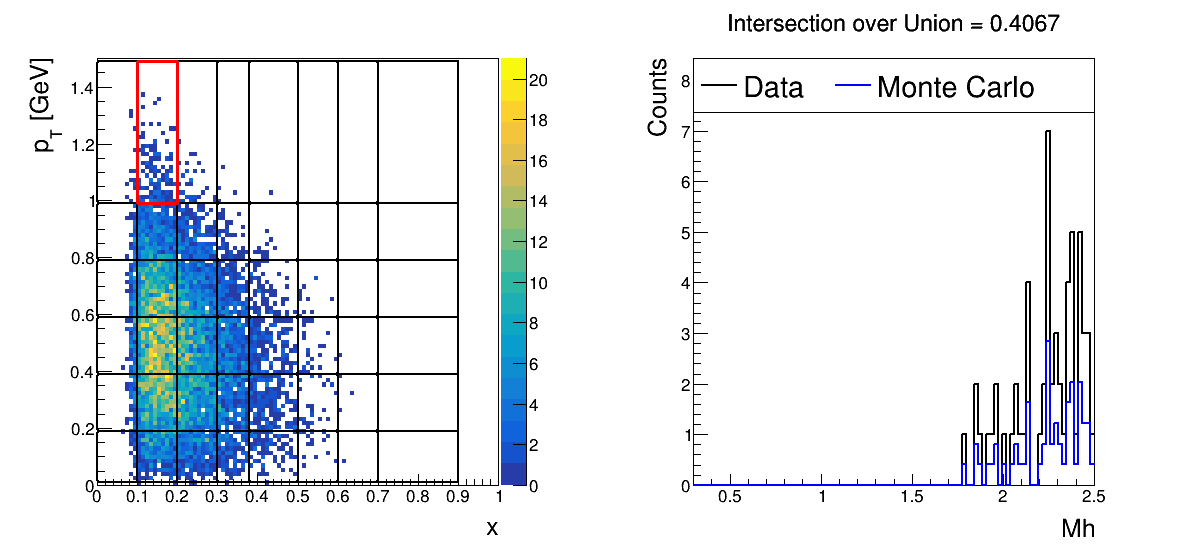

In [101]:
canvas=plot_map(bin_manager,histograms,data_tree,mc_tree,12)
canvas.Draw()

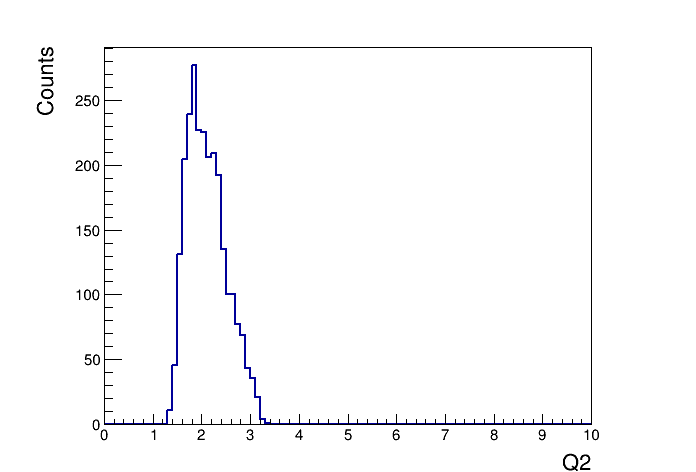

In [77]:
ROOT.EnableImplicitMT(1)

c=ROOT.TCanvas()
histograms[2][25].Draw("hist colz")
c.Draw()

In [15]:
data_files=get_first_N_files("../../projects/test_data/volatile/data/piplus_piminus/",25,"nSidis_RGA_*")
mc_files=get_first_N_files("../../projects/test/volatile/data/piplus_piminus/",10,"MC_RGA*")
data_tree=ROOT.TChain("dihadron_cuts")
mc_tree=ROOT.TChain("dihadron_cuts")
for data_file in data_files:
    data_tree.Add(data_file)
for mc_file in mc_files:
    mc_tree.Add(mc_file)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


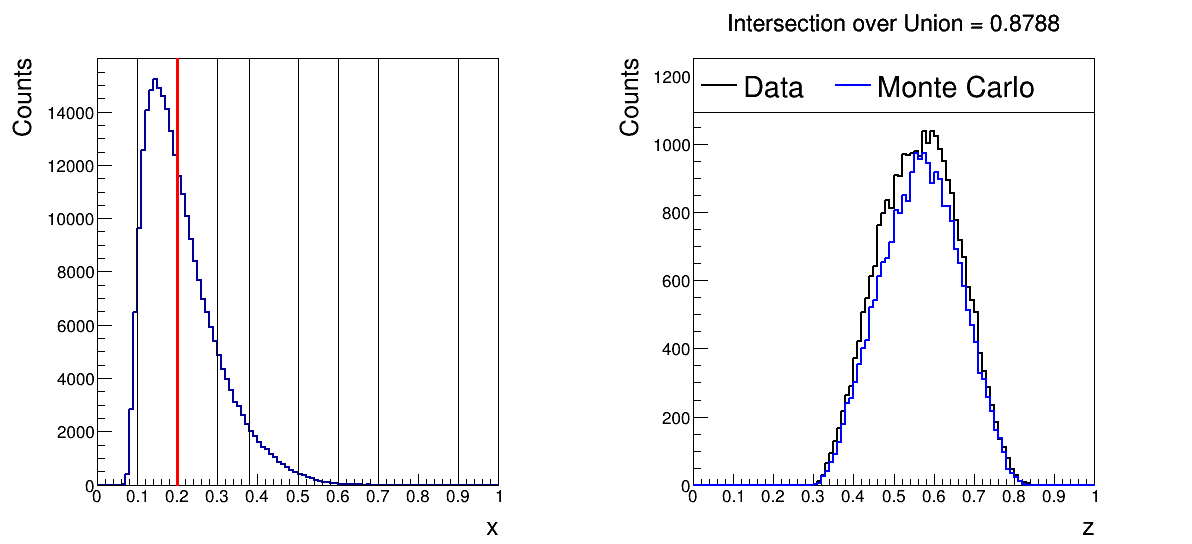

In [16]:
c=plot_map(bin_manager = bin_manager,
           hists_pars = [("x",";x;Counts",100,0,1),
                         ("z",";z;Counts",100,0,1)],
           data_tree = data_tree,
           mc_tree = mc_tree,
           uID = 2,
           plot_variable="rec_z",
           extra_cut = "rec_passDihadron")
c.Draw()